
# Análise dos dados de crimes na cidade de São Paulo

Este notebook realiza uma análise descritiva de registros criminais com base em quatro variáveis principais:
- **Data**
- **Hora**
- **Tipo de crime**
- **Bairro**

O objetivo é entender a distribuição, identificar padrões e gerar insights para auxiliar na prevenção e gestão da segurança pública.

# **Fonte de dados**

**Secretaria de Segurança Pública do Estado de São Paulo (SSP-SP)**

Os dados são de 2024 e foram acessados por meio do download direto. São fornecidos em formato estruturado, organizados em planilha .xlsx (Excel) e agrupados por:
- Tipo de crime
- Tipificação penal
- Distrito Policial (DP)
- Data
- Hora
- Bairro
- Latitude e longitude.

# **Conclusão**

A análise descritiva mostrou que a criminalidade em São Paulo segue padrões claros. Com uma maior robustez de dados públicos disponíveis é possível criar modelos mais detalhados e realizar em insights mais profundos, aumentando potencial da ciência de dados como ferramenta de apoio à segurança urbana. O uso inteligente dessas informações pode gerar cidades mais seguras, melhor distribuídas em termos de proteção, e com políticas públicas mais eficientes.

In [28]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


In [33]:
url = 'https://drive.google.com/uc?export=download&id=1jkfqXaS6Ah3k5GP-pajgBaq7CBKSvkIt'
df = pd.read_csv(url, parse_dates=['data'])

df.head()

/tmp/ipython-input-33-1188302060.py:2: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, parse_dates=['data'])
/tmp/ipython-input-33-1188302060.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(url, parse_dates=['data'])


,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,NUM_BO,ANO_BO,DATA_REGISTRO,data,hora,hora_formatada,...,LONGITUDE,NOME_DELEGACIA_CIRCUNSCRIÇÃO,NOME_DEPARTAMENTO_CIRCUNSCRIÇÃO,NOME_SECCIONAL_CIRCUNSCRIÇÃO,NOME_MUNICIPIO_CIRCUNSCRIÇÃO,RUBRICA,DESCR_CONDUTA,tipo_crime,MES_ESTATISTICA,ANO_ESTATISTICA
0,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 1,S.PAULO,JU5476,2024,18/07/24,2024-07-18,7:00:00 AM,07:00:00,...,"-46,639245",05º D.P. ACLIMACAO,DECAP,DEL.SEC.1º CENTRO,S.PAULO,Furto (art. 155),Interior de Veículo,FURTO - OUTROS,7,2024
1,DECAP,DEL.SEC.7º ITAQUERA,22º D.P. SAO MIGUEL PTA,S.PAULO,JR2334,2024,16/07/24,2024-07-14,2:30:00 PM,14:30:00,...,"-46,6357774",05º D.P. ACLIMACAO,DECAP,DEL.SEC.1º CENTRO,S.PAULO,Furto (art. 155),Veículo,FURTO DE VEÍCULO,7,2024
2,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,S.PAULO,KB3462,2024,24/07/24,2024-07-24,4:20:22 PM,16:20:22,...,"-46,6336614",05º D.P. ACLIMACAO,DECAP,DEL.SEC.1º CENTRO,S.PAULO,Furto (art. 155),Veículo,FURTO DE VEÍCULO,7,2024
3,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,S.PAULO,KJ8550,2024,31/07/24,2024-07-23,1:50:00 PM,13:50:00,...,"-46,6357774",05º D.P. ACLIMACAO,DECAP,DEL.SEC.1º CENTRO,S.PAULO,Lesão corporal (art. 129),NaN,LESÃO CORPORAL DOLOSA,7,2024
4,DECAP,DEL.SEC.1º CENTRO,08º D.P. BRAS,S.PAULO,JA3791,2024,02/07/24,2024-07-02,9:30:00 AM,09:30:00,...,0,06º D.P. CAMBUCI,DECAP,DEL.SEC.1º CENTRO,S.PAULO,Posse ou porte ilegal de arma de fogo de uso r...,NaN,APREENSÃO DE ENTORPECENTES,7,2024


In [34]:
df['hora'] = pd.to_datetime(df['hora'], format='%I:%M:%S %p', errors='coerce').dt.hour
df['dia_semana'] = df['data'].dt.day_name()
df['mes'] = df['data'].dt.month_name()

/tmp/ipython-input-35-2312609063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_por_tipo.values, y=crimes_por_tipo.index, palette='viridis')


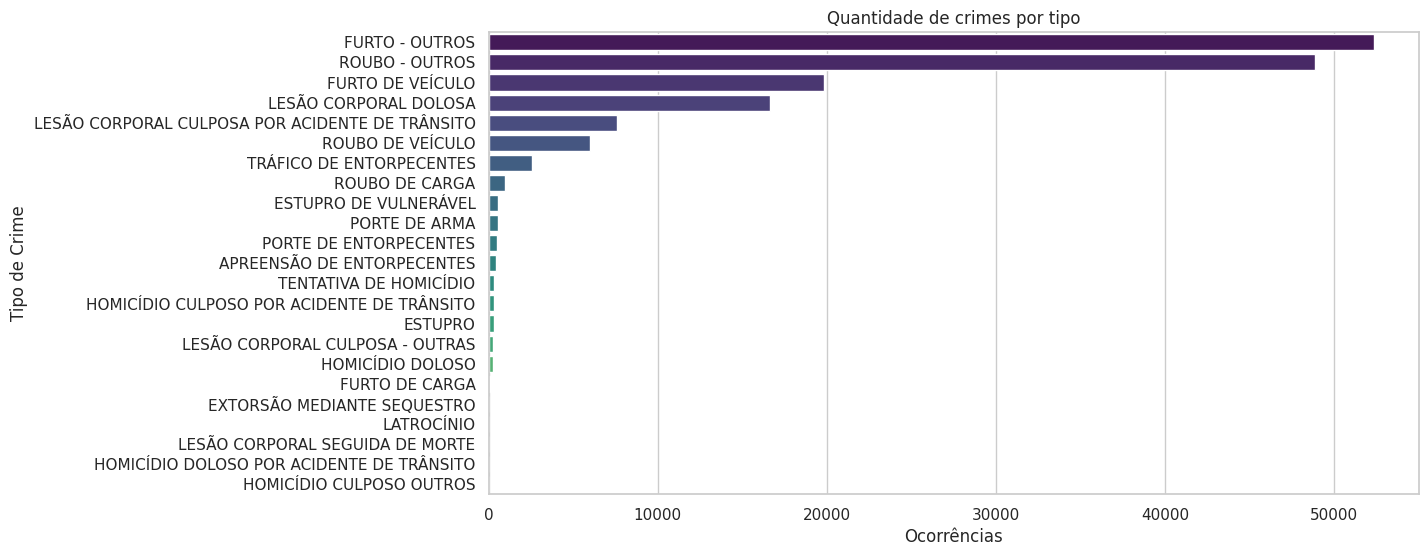

In [35]:
crimes_por_tipo = df['tipo_crime'].value_counts().sort_values(ascending=False)
sns.barplot(x=crimes_por_tipo.values, y=crimes_por_tipo.index, palette='viridis')
plt.title("Quantidade de crimes por tipo")
plt.xlabel("Ocorrências")
plt.ylabel("Tipo de Crime")
plt.show()


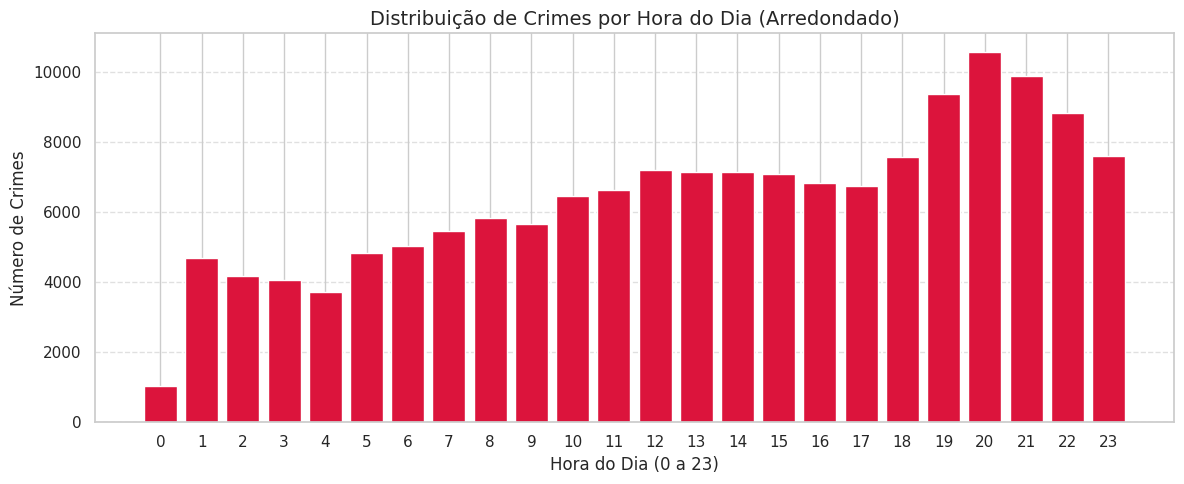

In [42]:
import numpy as np

df_filtrado = df[(df['hora_arredondada'] >= 0) & (df['hora_arredondada'] <= 23)]

contagem = df_filtrado['hora_arredondada'].value_counts().sort_index()
todas_as_horas = pd.Series(0, index=np.arange(24))
contagem_completa = todas_as_horas.add(contagem, fill_value=0)

plt.figure(figsize=(12, 5))
x = contagem_completa.index
y = contagem_completa.values

bars = plt.bar(x, y, color='crimson', width=0.8, align='center')

plt.title("Distribuição de Crimes por Hora do Dia", fontsize=14)
plt.xlabel("Hora do Dia (0 a 23)", fontsize=12)
plt.ylabel("Número de Crimes", fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-2366065385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crimes_bairro.index, x=crimes_bairro.values, palette='rocket')


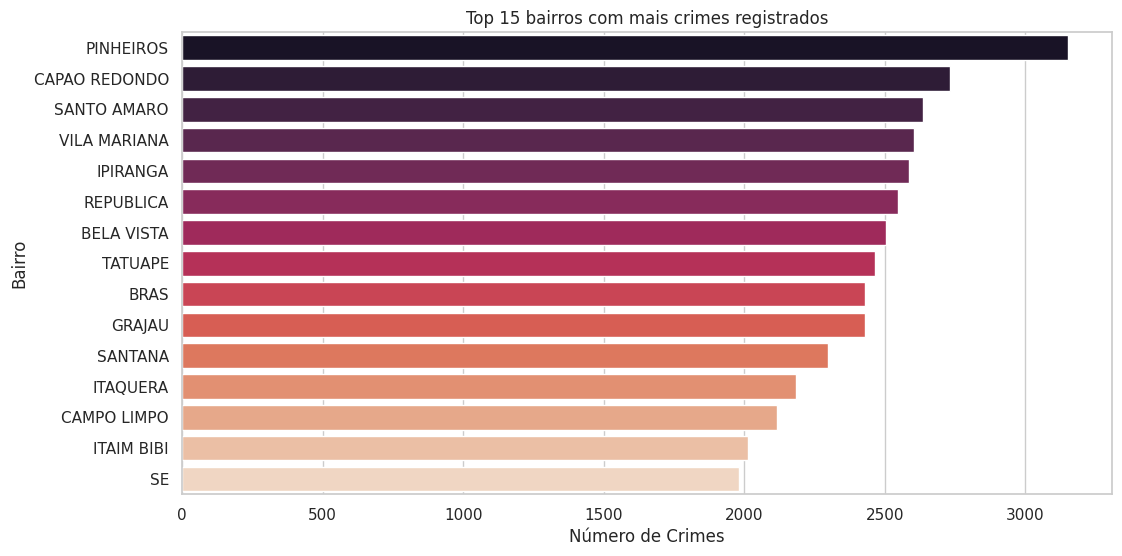

In [7]:
crimes_bairro = df['bairro'].value_counts().nlargest(15)
sns.barplot(y=crimes_bairro.index, x=crimes_bairro.values, palette='rocket')
plt.title("Top 15 bairros com mais crimes registrados")
plt.xlabel("Número de Crimes")
plt.ylabel("Bairro")
plt.show()


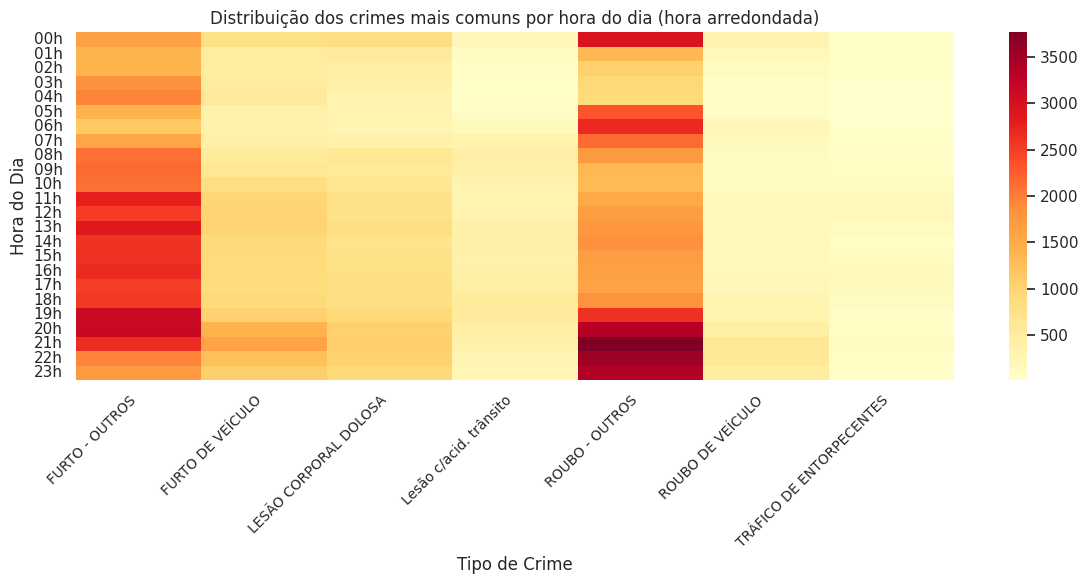

In [8]:
df_top_crimes = df[df['tipo_crime'].isin(df['tipo_crime'].value_counts().nlargest(7).index)].copy()

df_top_crimes['tipo_crime'] = df_top_crimes['tipo_crime'].replace({
    'LESÃO CORPORAL CULPOSA POR ACIDENTE DE TRÂNSITO': 'Lesão c/acid. trânsito'
})

df_top_crimes['hora_arredondada'] = (df_top_crimes['hora'] + 1) % 24

pivot_top = pd.pivot_table(
    df_top_crimes,
    index='hora_arredondada',
    columns='tipo_crime',
    aggfunc='size',
    fill_value=0
)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.heatmap(pivot_top, cmap='YlOrRd')
plt.title("Distribuição dos crimes mais comuns por hora do dia")
plt.xlabel("Tipo de Crime")
plt.ylabel("Hora do Dia")
plt.yticks(ticks=np.arange(0.5, 24.5, 1), labels=[f"{h:02d}h" for h in range(24)], rotation=0)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
tabela_crimes = df.groupby(['bairro', 'tipo_crime']).size().reset_index(name='ocorrencias')

total_ocorrencias = tabela_crimes.groupby('bairro')['ocorrencias'].sum().reset_index(name='total_bairro')

tabela_crimes = tabela_crimes.merge(total_ocorrencias, on='bairro')

tabela_crimes = tabela_crimes.sort_values(['bairro', 'ocorrencias'], ascending=[True, False])

mais_comum_por_bairro = tabela_crimes.drop_duplicates(subset=['bairro'], keep='first')

mais_comum_por_bairro = mais_comum_por_bairro.sort_values('total_bairro', ascending=False)

print("Tipo de crime mais comum por bairro (ordenado por total de ocorrências no bairro):")
display(mais_comum_por_bairro.head(15))


Tipo de crime mais comum por bairro (ordenado por total de ocorrências no bairro):


,bairro,tipo_crime,ocorrencias,total_bairro
5892,PINHEIROS,FURTO - OUTROS,1309,3152
519,CAPAO REDONDO,ROUBO - OUTROS,1404,2732
6213,SANTO AMARO,FURTO - OUTROS,990,2635
7871,VILA MARIANA,FURTO - OUTROS,1116,2604
1583,IPIRANGA,FURTO - OUTROS,991,2586
6087,REPUBLICA,ROUBO - OUTROS,1061,2547
212,BELA VISTA,FURTO - OUTROS,1164,2506
6504,TATUAPE,FURTO - OUTROS,905,2464
292,BRAS,FURTO - OUTROS,1177,2431
1457,GRAJAU,ROUBO - OUTROS,890,2430
